In [1]:
import pandas as pd
import numpy as np
import time                     #python 自带
from astropy.time import Time   #astropy 
from astropy import units as u  
from astropy import constants as const #import constants
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS
import ligo.skymap.plot

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from moviepy.video.io.bindings import mplfig_to_npimage#动图生成
import moviepy.editor as mpy

In [2]:
orbitDataTAIJI  =  pd.read_csv('orbitDataTAIJI.dat', index_col = 0)  #读取csv文件
orbitData      =  orbitDataTAIJI.loc[0:366,:]

#distance in unit AU  (u.AU)
#velocity in unit km/s

sunPX = orbitData['sunPX']  
sunPY = orbitData['sunPY']
sunPZ = orbitData['sunPZ']

earthPX = orbitData['earthPX']
earthPY = orbitData['earthPY']
earthPZ = orbitData['earthPZ']

scp1X = orbitData['scp1X']
scp1Y = orbitData['scp1Y']
scp1Z = orbitData['scp1Z']

scp2X = orbitData['scp2X']
scp2Y = orbitData['scp2Y']
scp2Z = orbitData['scp2Z']

scp3X = orbitData['scp3X']
scp3Y = orbitData['scp3Y']
scp3Z = orbitData['scp3Z']

In [3]:
CE = SkyCoord(x=earthPX, y=earthPY, z=earthPZ, unit='AU', representation_type='cartesian',  frame='icrs')
CS = SkyCoord(x=sunPX, y=sunPY, z=sunPZ, unit='AU', representation_type='cartesian',  frame='icrs')
Csc1 = SkyCoord(x=scp1X, y=scp1Y, z=scp1Z, unit='AU', representation_type='cartesian',  frame='icrs')
Csc2 = SkyCoord(x=scp2X, y=scp2Y, z=scp2Z, unit='AU', representation_type='cartesian',  frame='icrs')
Csc3 = SkyCoord(x=scp3X, y=scp3Y, z=scp3Z, unit='AU', representation_type='cartesian',  frame='icrs')

CE.representation_type = 'spherical'
CS.representation_type = 'spherical'
Csc1.representation_type = 'spherical'
Csc2.representation_type = 'spherical'
Csc3.representation_type = 'spherical'

#ICRS coordinates
cEarthUnit= SkyCoord(CE.ra , CE.dec, unit="deg", frame = 'icrs')  # defaults to ICRS frame
cSunUnit = SkyCoord(CS.ra , CS.dec, unit="deg", frame = 'icrs')  # defaults to ICRS frame

csc1Unit = SkyCoord(Csc1.ra , Csc1.dec, unit="deg", frame = 'icrs')  # defaults to ICRS frame
csc2Unit = SkyCoord(Csc2.ra , Csc2.dec, unit="deg", frame = 'icrs')  # defaults to ICRS frame
csc3Unit = SkyCoord(Csc3.ra , Csc3.dec, unit="deg", frame = 'icrs')  # defaults to ICRS frame


framename = 'barycentrictrueecliptic'
cGEarth = CE.transform_to(framename)  # cEarth.gcrs does the same thing
cGSun = CS.transform_to(framename)  
cGsc1 = Csc1.transform_to(framename)  
cGsc2 = Csc2.transform_to(framename)  
cGsc3 = Csc3.transform_to(framename)  


# #coordinates
# framename = 'icrs'
# cGEarthUnit= SkyCoord(cGEarth.ra , cGEarth.dec, unit="deg", frame = 'icrs')  # defaults to ICRS frame
# cGSunUnit = SkyCoord(cGSun.ra , cGSun.dec, unit="deg", frame = 'icrs')  # defaults to ICRS frame

# cGsc1Unit = SkyCoord(cGsc1.ra ,cGsc1.dec, unit="deg", frame ='icrs')  # defaults to ICRS frame
# cGsc2Unit = SkyCoord(cGsc2.ra , cGsc2.dec, unit="deg", frame = 'icrs')  # defaults to ICRS frame
# cGsc3Unit = SkyCoord(cGsc3.ra , cGsc3.dec, unit="deg", frame = 'icrs')  # defaults to ICRS frame


#coordinates(lon, lat) geocentric
framename = 'icrs'
cGEarthUnit= SkyCoord(cGEarth.lon , cGEarth.lat, unit="deg", frame = framename)  # defaults to ICRS frame
cGSunUnit = SkyCoord(cGSun.lon , cGSun.lat, unit="deg", frame = framename)  # defaults to ICRS frame

cGsc1Unit = SkyCoord(cGsc1.lon ,cGsc1.lat, unit="deg", frame = framename)  # defaults to ICRS frame
cGsc2Unit = SkyCoord(cGsc2.lon , cGsc2.lat, unit="deg", frame = framename)  # defaults to ICRS frame
cGsc3Unit = SkyCoord(cGsc3.lon , cGsc3.lat, unit="deg", frame = framename)  # defaults to ICRS frame


#coordinates(l,b) #galactic
# framename = 'icrs'
# cGEarthUnit= SkyCoord(cGEarth.l , cGEarth.b, unit="deg", frame = framename)  # defaults to ICRS frame
# cGSunUnit = SkyCoord(cGSun.l , cGSun.b, unit="deg", frame = framename)  # defaults to ICRS frame

# cGsc1Unit = SkyCoord(cGsc1.l ,cGsc1.b, unit="deg", frame = framename)  # defaults to ICRS frame
# cGsc2Unit = SkyCoord(cGsc2.l , cGsc2.b, unit="deg", frame = framename)  # defaults to ICRS frame
# cGsc3Unit = SkyCoord(cGsc3.l , cGsc3.b, unit="deg", frame = framename)  # defaults to ICRS frame

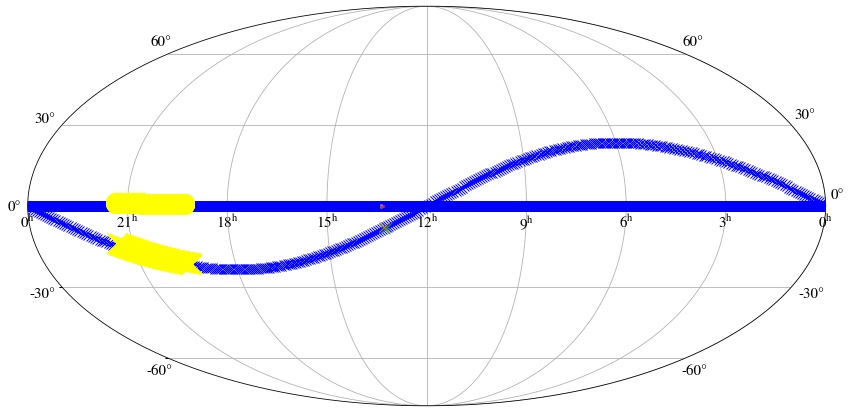

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
# 绘图


fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection='astro hours mollweide')

ax.plot_coord(cEarthUnit[0:-1],'x',c='blue',markersize=10)
ax.plot_coord(cSunUnit [0:-1],'x',c='yellow',markersize=20)
ax.plot_coord(csc1Unit[0],'x',markersize=10)
ax.plot_coord(csc2Unit[0],'x', markersize=10)
ax.plot_coord(csc3Unit[0],'x',markersize=10)


ax.plot_coord(cGEarthUnit[0:-1],'o',c='blue',markersize=10)
ax.plot_coord(cGSunUnit [0:-1],'o',c='yellow',markersize=20)
ax.plot_coord(cGsc1Unit[0],'o',markersize=2)
ax.plot_coord(cGsc2Unit[0],'o', markersize=2)
ax.plot_coord(cGsc3Unit[0],'o',markersize=2)
ax.grid(ax)
plt.tight_layout()
plt.show()

t:   0%|          | 0/300 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


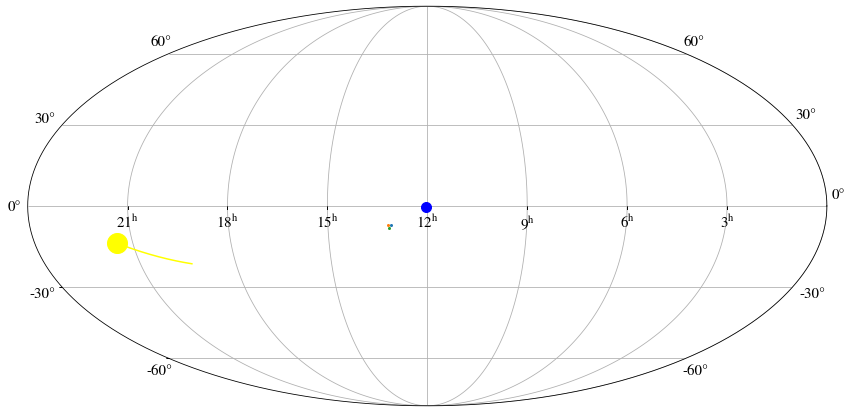

In [5]:
# #绘动图3d2#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
# 绘图

duration = 10 #总共的时间       figsize代表横纵比
speed = 1.0#播放速率    
number = len(cEarthUnit)

# plt.style.use('dark_background')


fig_mpl = plt.figure(figsize=(12,6))

# 使用MOVIEPY让图动起来(根据时间t来更新图). 保存为GIF.
def make_frame_mpl(t):
    tNorm = t/duration      #0 --> 1
    index = int(number*(t/duration))  #0 --> number
  
    ax = fig_mpl.add_subplot(111, projection='astro hours mollweide')
    ax.remove() #ax.clear不管用,会将整个ax框架清除，而不是只把图像清除
    ax = fig_mpl.add_subplot(111, projection='astro hours mollweide')

    #sun
    ax.plot_coord(cSunUnit[index],'o',c='yellow',markersize=20)
    ax.plot_coord(cSunUnit[0:(index + 1)],c='yellow')
    #earth
    ax.plot_coord(cEarthUnit[index],'o',c='blue',markersize=10)   
#     ax.plot_coord(cEarth[0:(index + 1)],c='blue')   
    
    ####TAIJI####
    ax.plot_coord(csc1Unit[index],'o',markersize=2)    
    ax.plot_coord(csc2Unit[index],'o', markersize=2)
    ax.plot_coord(csc3Unit[index],'o',markersize=2)
    ax.grid(ax)
    plt.tight_layout()
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
# animation.speedx(speed).write_videofile("taiji_orbit.mp4", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
#animation.speedx(speed).write_gif("TAIJI&LISA.gif", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
animation.speedx(speed).ipython_display(fps=30, loop=1, autoplay=0)

t:   0%|          | 0/300 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


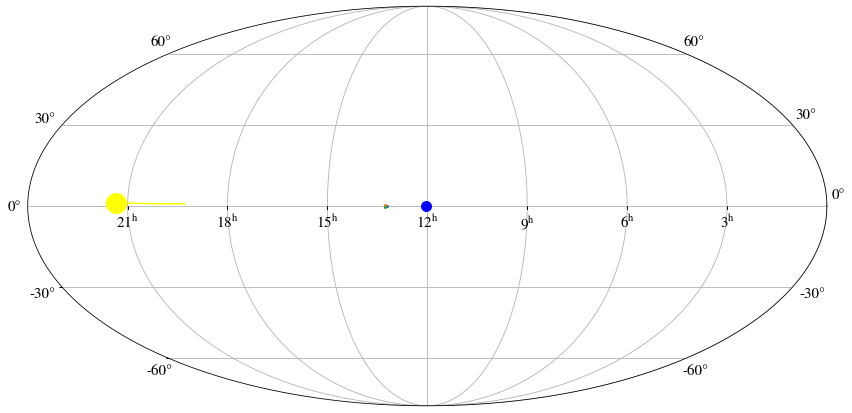

In [6]:
# #绘动图3d2#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
# 绘图

duration = 10 #总共的时间       figsize代表横纵比
speed = 1.0#播放速率    
number = len(cGEarthUnit)

# plt.style.use('dark_background')


fig_mpl = plt.figure(figsize=(12,6))

# 使用MOVIEPY让图动起来(根据时间t来更新图). 保存为GIF.
def make_frame_mpl(t):
    tNorm = t/duration      #0 --> 1
    index = int(number*(t/duration))  #0 --> number
  
    ax = fig_mpl.add_subplot(111, projection='astro hours mollweide')
    ax.remove() #ax.clear不管用,会将整个ax框架清除，而不是只把图像清除
    ax = fig_mpl.add_subplot(111, projection='astro hours mollweide')

    #sun
    ax.plot_coord(cGSunUnit[index],'o',c='yellow',markersize=20)
    ax.plot_coord(cGSunUnit[0:(index + 1)],c='yellow')
    #earth
    ax.plot_coord(cGEarthUnit[index],'o',c='blue',markersize=10)   
#     ax.plot_coord(cEarth[0:(index + 1)],c='blue')   
    
    ####TAIJI####
    ax.plot_coord(cGsc1Unit[index],'o',markersize=2)    
    ax.plot_coord(cGsc2Unit[index],'o', markersize=2)
    ax.plot_coord(cGsc3Unit[index],'o',markersize=2)
    ax.grid(ax)
    plt.tight_layout()
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
# animation.speedx(speed).write_videofile("taiji_orbit.mp4", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
#animation.speedx(speed).write_gif("TAIJI&LISA.gif", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
animation.speedx(speed).ipython_display(fps=30, loop=1, autoplay=0)